# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [661]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [662]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

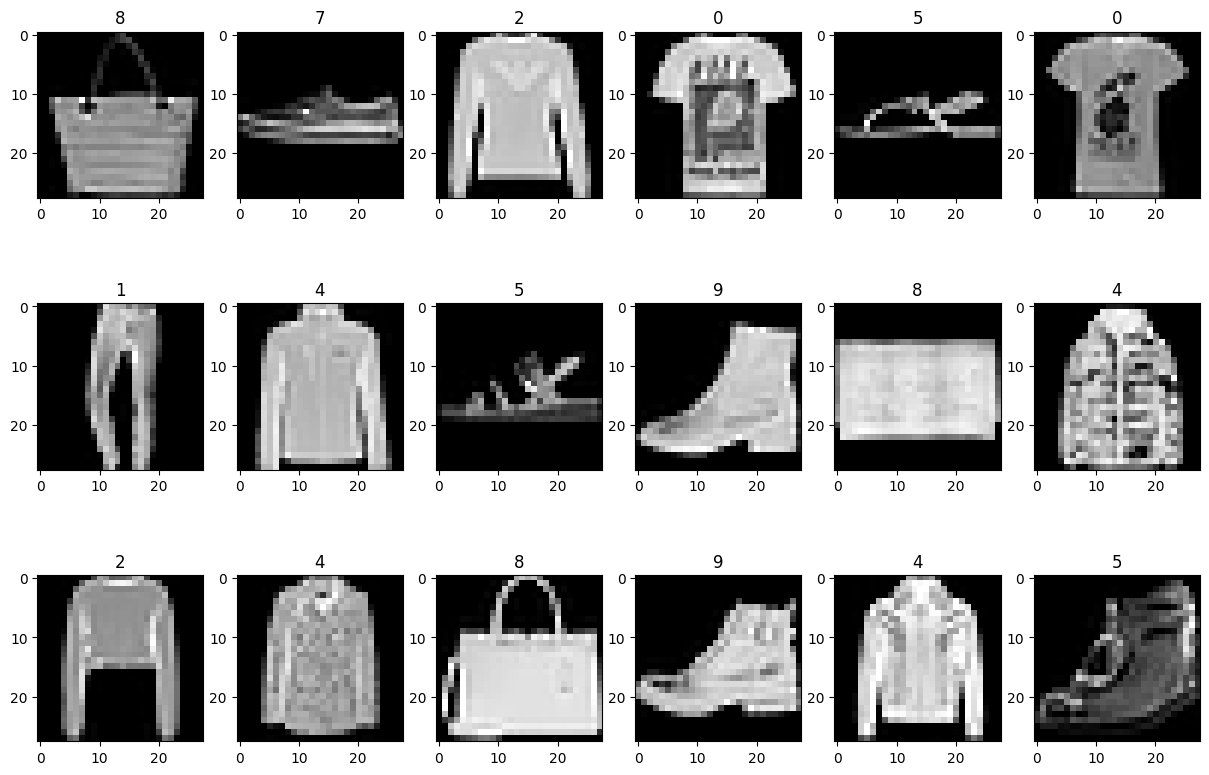

In [663]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [664]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [665]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_100 (InputLayer)      [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_175 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 flatten_98 (Flatten)        (None, 25088)             0         
                                                                 
 dense_305 (Dense)           (None, 128)               3211392   
                                                                 
 dense_306 (Dense)           (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [673]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4150 - accuracy: 0.8557 - val_loss: 0.3379 - val_accuracy: 0.8769
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2831 - accuracy: 0.8992 - val_loss: 0.3054 - val_accuracy: 0.8882
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2376 - accuracy: 0.9148 - val_loss: 0.3059 - val_accuracy: 0.8923
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2065 - accuracy: 0.9255 - val_loss: 0.3214 - val_accuracy: 0.8924
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1794 - accuracy: 0.9350 - val_loss: 0.3305 - val_accuracy: 0.8931
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1611 - accuracy: 0.9420 - val_loss: 0.3325 - val_accuracy: 0.8942
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1427 - accuracy: 0.9487 - val_loss: 0.3543 - val_accuracy: 0.8935
Epoch 

Train Acc      0.9957500100135803
Validation Acc 0.8858000040054321


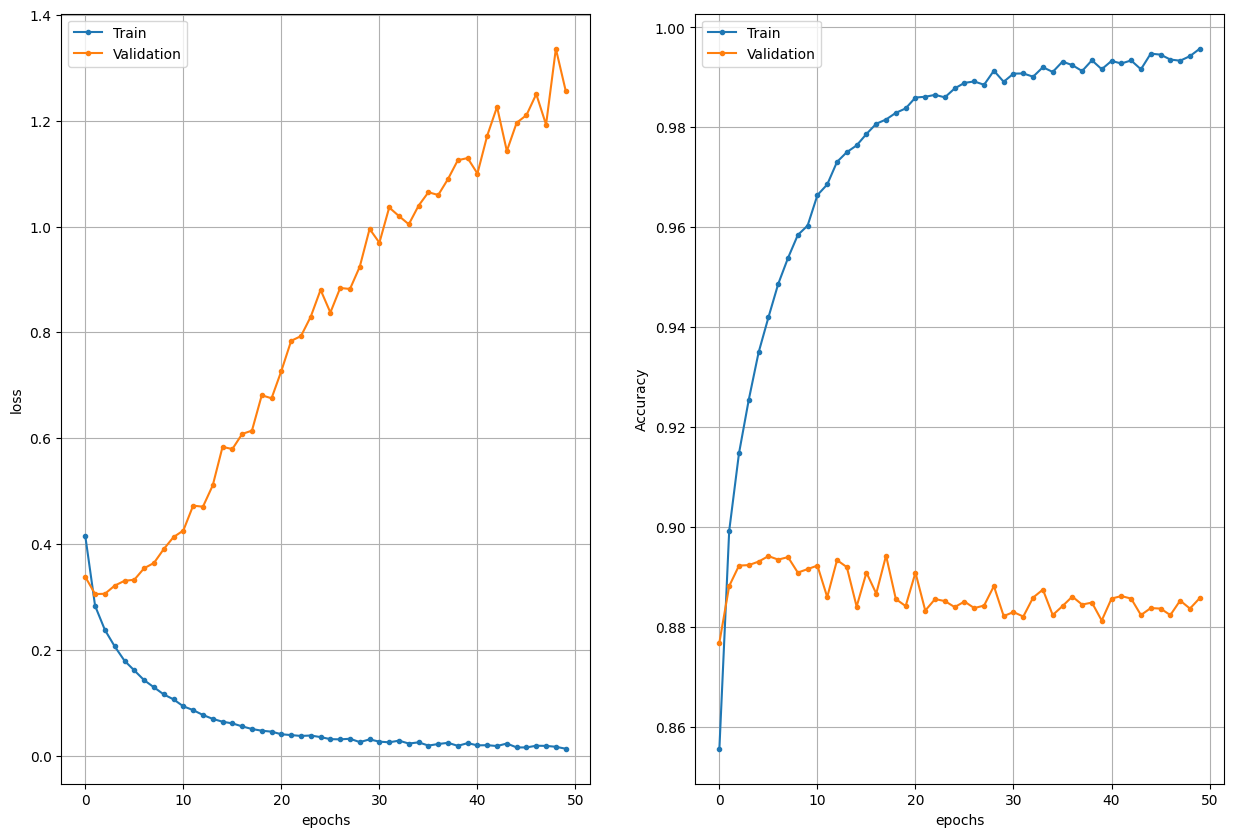

In [674]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [668]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.5)(net)

net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = Dense(64, activation='relu', kernel_regularizer=l2(0.005))(net)
net = Dense(32, activation='relu', kernel_regularizer=l2(0.005))(net)

outputs = Dense(10, activation="softmax")(net)

model_new = Model(inputs, outputs)
model_new.summary()

Model: "model_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_101 (InputLayer)      [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_176 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_136 (Ba  (None, 28, 28, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_137 (Dropout)       (None, 14, 14, 32)        0         
                                                                 
 conv2d_177 (Conv2D)         (None, 14, 14, 64)        184

In [669]:
from sklearn.utils import shuffle

def adjust_brightness(image):
    return np.clip(image * np.random.randint(90, 110) / 100, 0, 1.)

def adjust_contrast(image):
    mean = np.mean(image)
    return np.clip((image - mean) * np.random.randint(90, 110) / 100 + mean, 0, 1.)

def add_noise(image):
    return image + np.random.randint(0, 8, image.shape) / 255

def translate(image):
    x_shift = np.random.randint(-3, 3)
    y_shift = np.random.randint(-3, 3)
    return cv2.warpAffine(image, np.float32([[1, 0, x_shift], [0, 1, y_shift]]), image.shape)

def rotate(image):
    angle = np.random.randint(-3, 3)
    x, y = image.shape
    return cv2.warpAffine(image, cv2.getRotationMatrix2D((x / 2, y / 2) , angle, 1.0), image.shape)

TRANSFORMATIONS = [
    (np.fliplr, 0.3),
    #np.flipud,
    #np.rot90,
    (adjust_brightness, 0.2),
    (adjust_contrast, 0.2),
    (add_noise, 0.3),
    #translate,
    #rotate,
]
def apply_transformations(image):
    temp = np.copy(image)
    for transform in TRANSFORMATIONS:
        if np.random.rand() < transform[1]:
            temp = transform[0](temp)
    return temp

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                x_[idx_aug, ...] = apply_transformations(x_[idx_aug, ...])                 
                    
            yield x_, y_

In [670]:
# Train the network
epochs = 50
batch_size = 64

steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)

model_new.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = model_new.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
937/937 [==============================] - 9s 9ms/step - loss: 0.8480 - accuracy: 0.7896 - val_loss: 0.5100 - val_accuracy: 0.8573
Epoch 2/50
937/937 [==============================] - 8s 9ms/step - loss: 0.4636 - accuracy: 0.8607 - val_loss: 0.3783 - val_accuracy: 0.8849
Epoch 3/50
937/937 [==============================] - 8s 9ms/step - loss: 0.3847 - accuracy: 0.8782 - val_loss: 0.3599 - val_accuracy: 0.8808
Epoch 4/50
937/937 [==============================] - 8s 9ms/step - loss: 0.3450 - accuracy: 0.8862 - val_loss: 0.3274 - val_accuracy: 0.8925
Epoch 5/50
937/937 [==============================] - 8s 9ms/step - loss: 0.3233 - accuracy: 0.8930 - val_loss: 0.2960 - val_accuracy: 0.9046
Epoch 6/50
937/937 [==============================] - 8s 9ms/step - loss: 0.3059 - accuracy: 0.8960 - val_loss: 0.3091 - val_accuracy: 0.8941
Epoch 7/50
937/937 [==============================] - 8s 8ms/step - loss: 0.2960 - accuracy: 0.8999 - val_loss: 0.3862 - val_accuracy: 0.8707
Epoch 

Train Acc      0.923325777053833
Validation Acc 0.9162999987602234


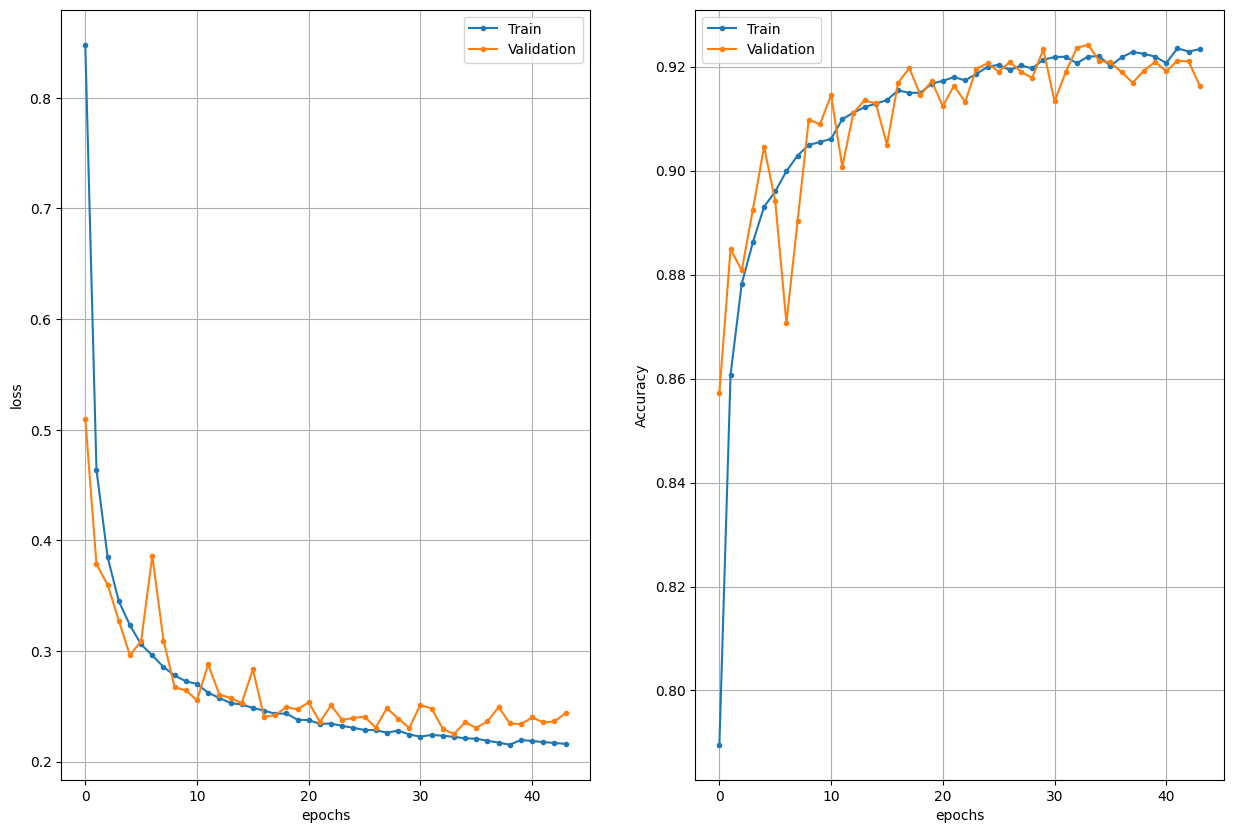

In [672]:
# Show the results
plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

It's is impossible to describe any order, because I spent a half of the day during optimizations

What I want to mention:
* I don't understand why brightness and contrast augumentations provides the better result, but they are. Looks like Conv2D should have similar filters
* Too high noise values reduces the accuracy but noise that is less than 5% provides better precision
* fliplr works well, but any other transformation (flipud, rotate90, rotate for smaller angles, translation) reduces the accuracy 
* kernel_regularizer in some layers reduces accuracy
* patience property in EarlyStopping should be higher for more difficult models

And some extra info:
* It is critical to configure GPU usage
* Python allows make "beep" sound ))) It's useful for making notification when model fitting is finished